In [2]:
import pandas as pd

teams = ['DET', 'CLE', 'NOP', 'WAS', 'PHI', 'CHI', 'UTA', 'CHO', 'IND',
       'DEN', 'NYK', 'SAS', 'DAL', 'LAC', 'MIN', 'MEM', 'ATL', 'MIA',
       'OKC', 'TOR', 'BRK', 'GSW', 'LAL', 'POR', 'PHO', 'SAC', 'HOU',
       'MIL', 'ORL', 'BOS']

def concat(teams):
    df = pd.DataFrame()
    for team in teams:
        df_team = pd.read_excel('queries.xlsx', sheet_name=team).dropna()
        df_team['team'] = team
        df = pd.concat([df,df_team], axis=0)

    return df


df = concat(teams)

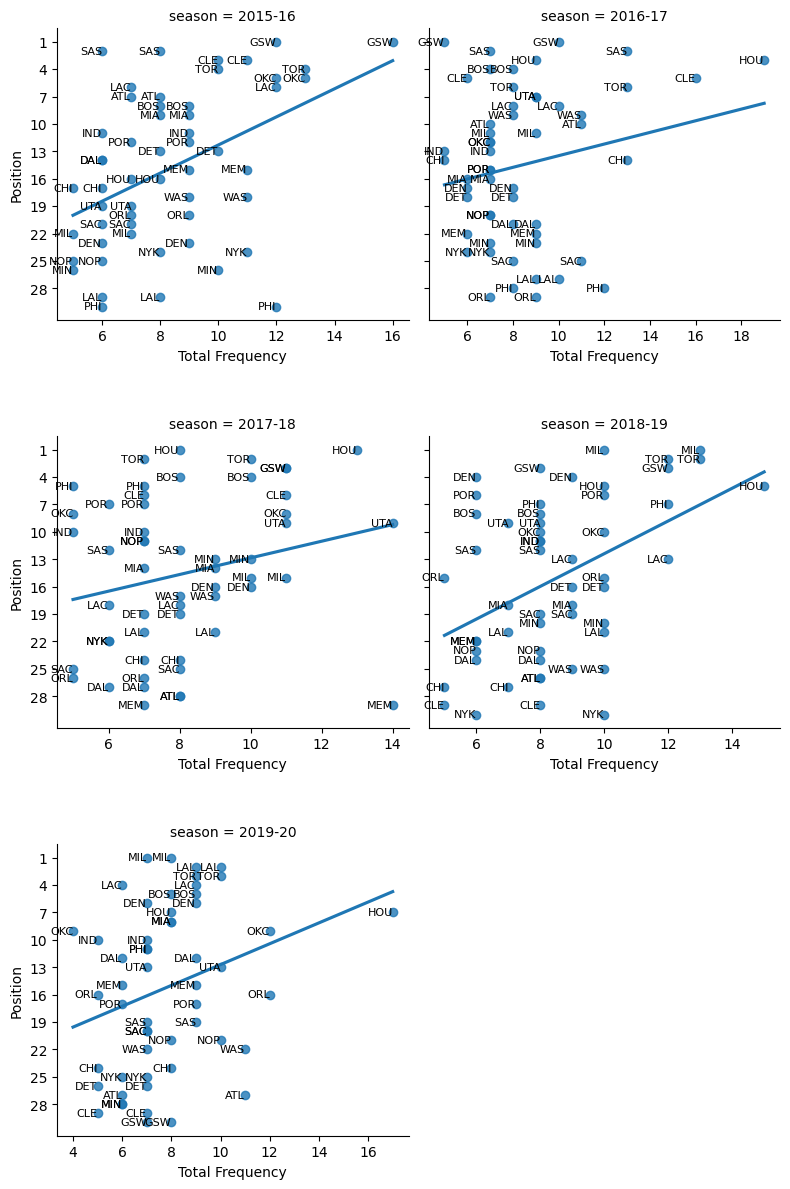

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

all_data = []

standings_files = {
    "2015-16": "NBA_2015_16_Standings.csv",
    "2016-17": "NBA_2016-17_Standings.csv",
    "2017-18": "NBA_2017-18_Standings.csv",
    "2018-19": "NBA_2018-19_Standings.csv",
    "2019-20": "NBA_2019-20_Standings.csv"
}

for season, file in standings_files.items():
    standings = pd.read_csv('standings/'+file)
    standings.columns = ['team', 'pos']

    dff = df[(df.event == 2) & (df.season == season)]

    dff = pd.merge(left=dff, right=standings, how='inner')

    dff["season"] = season

    all_data.append(dff)

df_all_seasons = pd.concat(all_data)

g = sns.FacetGrid(df_all_seasons, col="season", col_wrap=2, height=4, sharex=False, sharey=True)
g.map_dataframe(sns.regplot, x="total_frequency", y="pos", ci=None)

for ax, (season, data) in zip(g.axes.flat, df_all_seasons.groupby("season")):
    for i, row in data.iterrows():
        ax.text(row['total_frequency'], row['pos'], row['team'], fontsize=8, ha='right', va='center')

for ax in g.axes.flat:
    ax.set_yticks(range(1, 31, 3))
    # ax.set_xticks(range(8, 33, 3))
    ax.invert_yaxis()
    ax.set_ylabel("Position")
    ax.set_xlabel("Total Frequency")

plt.subplots_adjust(hspace=0.4)
plt.savefig('images/new_algo/freq_pos.png')
plt.show()


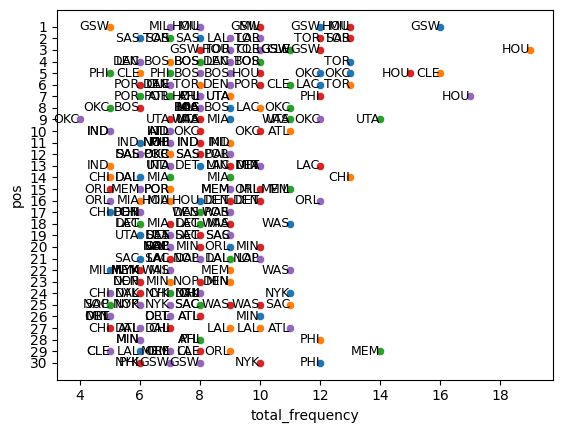

In [7]:
import os

seasons = []
for file in os.listdir('standings'):
    seasons.append(str(file))


for season, seas in zip(seasons,df.season.unique()):
    standings = pd.read_csv('standings/'+season)
    standings.columns = ['team','pos']

    dff = df[(df.event==2) & (df.season==seas)]

    dff = pd.merge(left=dff, right=standings, how='inner')

    sns.scatterplot(dff, x='total_frequency',y='pos')

    for i, row in dff.iterrows():
        plt.text(row['total_frequency'], row['pos'], row['team'], 
                fontsize=9, ha='right', va='center')
        
    plt.yticks([i for i in range(1,31)])
    plt.gca().invert_yaxis()

Text(0.5, 1.0, 'Frequency of most common sequence for last two events')

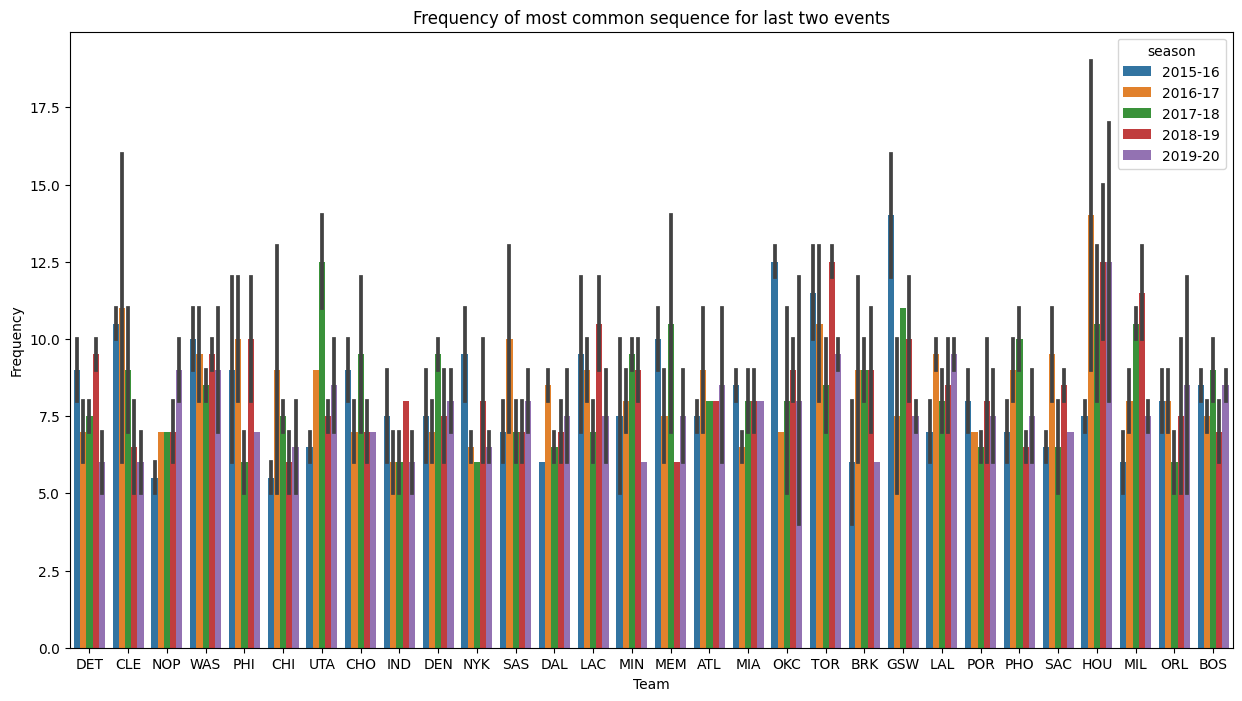

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.barplot(df[df.event == 2], x='team', y='total_frequency', hue='season')
plt.ylabel('Frequency')
plt.xlabel('Team')
plt.title('Frequency of most common sequence for last two events')

Text(0.5, 1.0, 'Frequency of most common sequence for last three events')

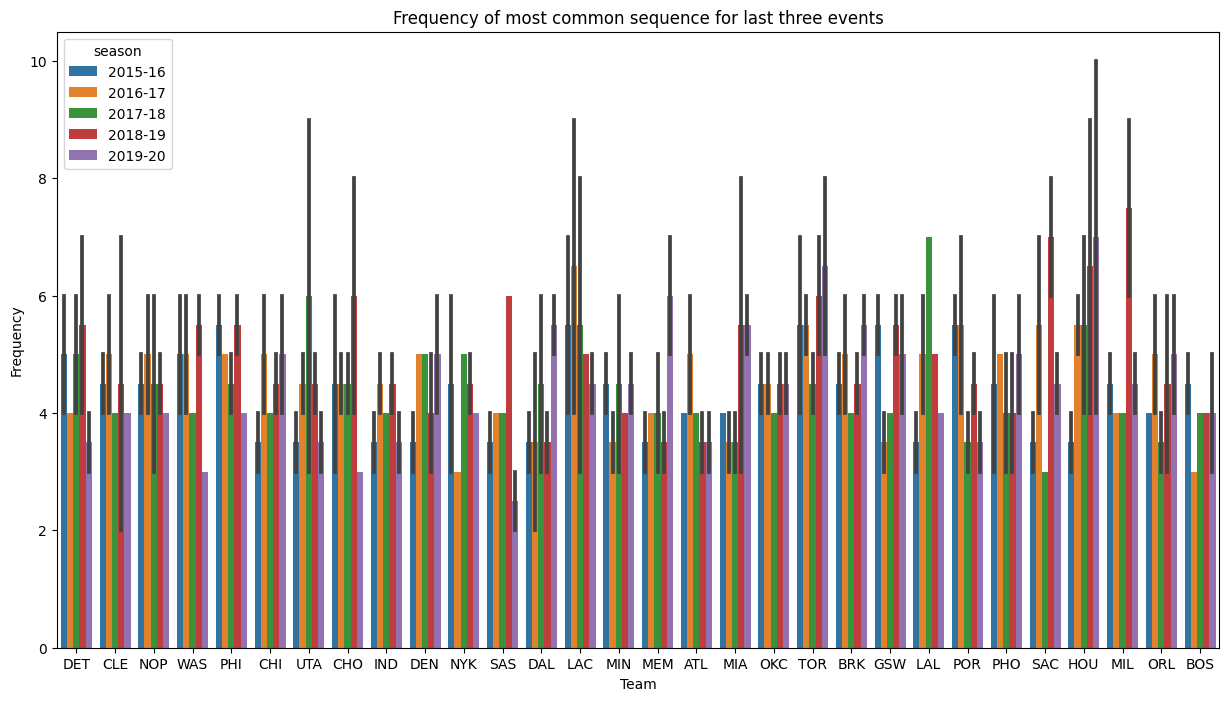

In [9]:
plt.figure(figsize=(15,8))
sns.barplot(df[df.event == 3], x='team', y='total_frequency', hue='season')
plt.ylabel('Frequency')
plt.xlabel('Team')
plt.title('Frequency of most common sequence for last three events')

Text(0.5, 1.0, 'Ratio of most common sequence versus all sequences for last two events')

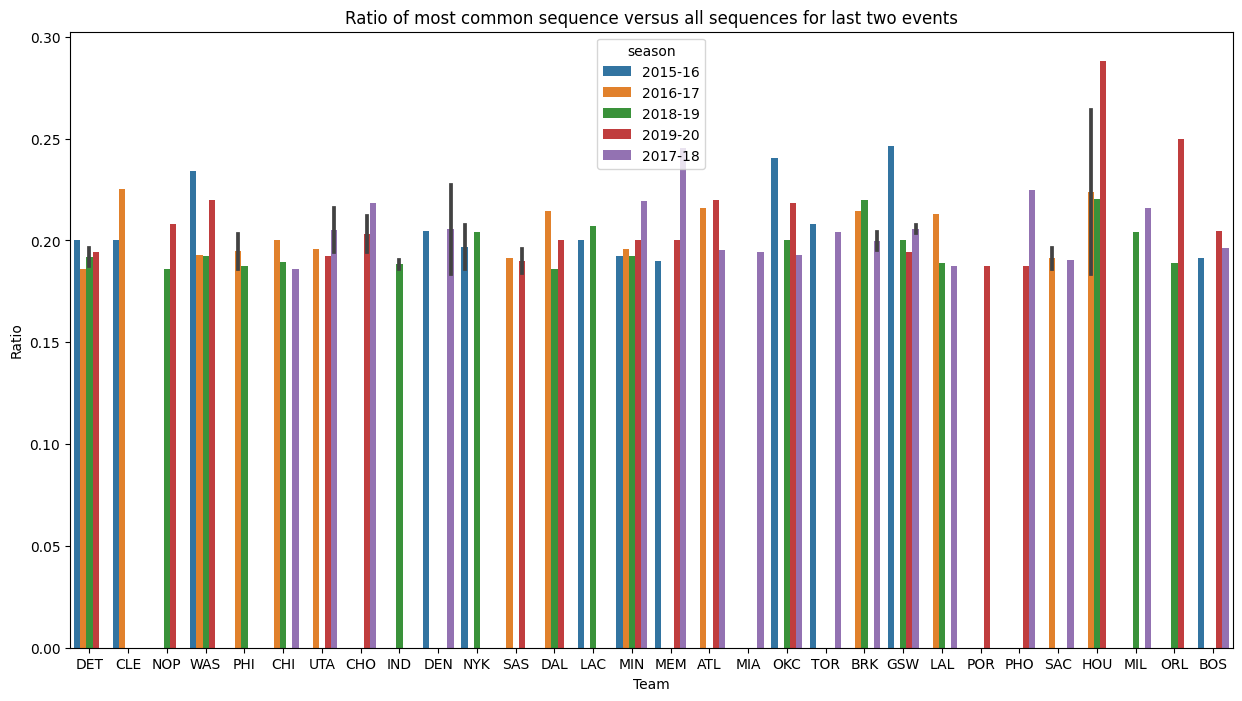

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(df[(df.event == 2) & (df.total_ratio > df.total_ratio.quantile(0.6))], x='team', y='total_ratio', hue='season')
plt.ylabel('Ratio')
plt.xlabel('Team')
plt.title('Ratio of most common sequence versus all sequences for last two events')

Text(0.5, 1.0, 'Ratio of most common sequence versus all sequences for last three events')

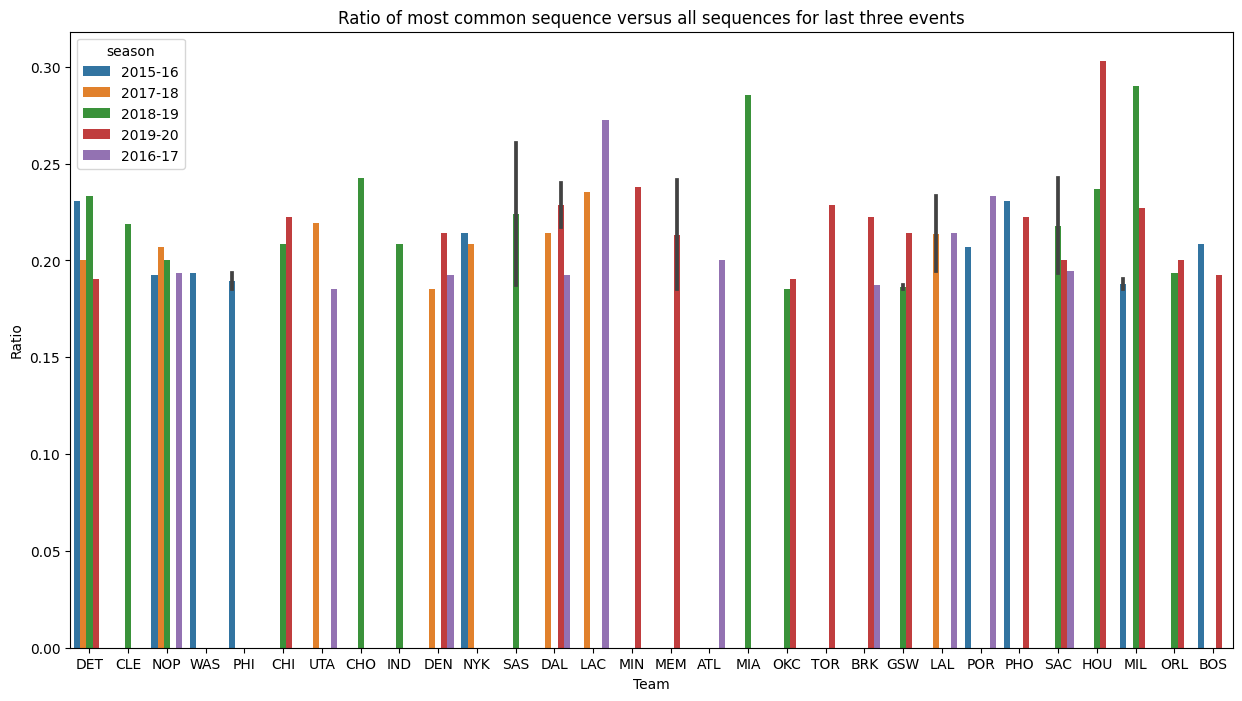

In [11]:
plt.figure(figsize=(15,8))
sns.barplot(df[(df.event == 3) & (df.total_ratio > df.total_ratio.quantile(0.6))], x='team', y='total_ratio', hue='season')
plt.ylabel('Ratio')
plt.xlabel('Team')
plt.title('Ratio of most common sequence versus all sequences for last three events')

In [15]:
a

,event,sequence,total_frequency,total_ratio,total_sec_frequency,total_sec_ratio
0,1,[{'Fouler10': 'fouler_same'}],4737,42.0972,2577,23.1511
1,1,"[{'ShotDist10': 'close', 'Shooter10': 'shooter...",138,1.4178,127,1.2900
2,2,"[{'FreeThrowShooter9': 'ft_other', 'Fouler10':...",56,1.1349,54,1.0976
3,2,"[{'FreeThrowShooter9': 'ft_other', 'FreeThrowS...",40,0.8199,33,0.6743
4,2,"[{'FreeThrowShooter9': 'ft_same', 'Rebounder10...",21,0.4002,19,0.3597
...,...,...,...,...,...,...
222,5,"[{'TimeoutTeam6': 'timeout_other', 'Substituti...",2,0.1667,2,0.1667
223,5,"[{'TimeoutTeam6': 'timeout_same', 'Substitutio...",2,0.1818,1,0.0909
224,5,"[{'TurnoverPlayer6': 'to_player_other', 'ShotD...",2,0.1538,2,0.1538
225,5,"[{'TurnoverPlayer6': 'to_player_same', 'ShotDi...",1,0.1000,1,0.1000


In [33]:
a = (
    df[df['venue'] == 'home']
    .groupby(['event', 'sequence'])[['total_frequency', 'total_ratio', 'total_sec_frequency', 'total_sec_ratio']]
    .sum()
    .reset_index()
)

max_sequence_per_event = a.loc[a.groupby('event')['total_frequency'].idxmax(), ['event', 'sequence', 'total_frequency', 'total_ratio', 'total_sec_frequency', 'total_sec_ratio']]
max_sequence_per_event

,event,sequence,total_frequency,total_ratio,total_sec_frequency,total_sec_ratio
0,1,[{'Fouler10': 'fouler_same'}],4737,42.0972,2577,23.1511
13,2,"[{'ShotDist9': 'close', 'Shooter9': 'shooter_o...",566,10.6963,438,8.2772
24,3,"[{'Rebounder8': 'rebounder_other', 'ReboundTyp...",142,4.9869,104,3.6588
85,4,"[{'ShotDist7': '3pt', 'Shooter7': 'shooter_sam...",61,3.2982,42,2.2806
180,5,"[{'ShotDist6': '3pt', 'Shooter6': 'shooter_sam...",19,1.2836,16,1.0977


In [28]:
b = (
    df[df['venue'] == 'away']
    .groupby(['event', 'sequence'])[['total_frequency', 'total_ratio', 'total_sec_frequency', 'total_sec_ratio']]
    .sum()
    .reset_index()
)

max_sequence_per_event = b.loc[a.groupby('event')['total_frequency'].idxmax(), ['event', 'sequence', 'total_frequency', 'total_ratio', 'total_sec_frequency', 'total_sec_ratio']]
max_sequence_per_event

,event,sequence,total_frequency,total_ratio,total_sec_frequency,total_sec_ratio
0,1,[{'Fouler10': 'fouler_same'}],4135,40.8342,2304,22.7766
13,2,"[{'ShotDist9': '3pt', 'Shooter9': 'shooter_oth...",107,2.2385,88,1.8646
24,3,"[{'Fouler8': 'fouler_same', 'FreeThrowShooter9...",84,3.1000,65,2.3670
85,4,"[{'ShotDist7': '3pt', 'Shooter7': 'shooter_sam...",3,0.1500,2,0.1000
180,5,"[{'ShotDist6': '3pt', 'Shooter6': 'shooter_oth...",2,0.1667,2,0.1667
